# Import packages & libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read & load data

In [2]:
data =  pd.read_csv('catA_train.csv')
data = data[data['Sales (Domestic Ultimate Total USD)'] > 0]
data = data[data['Sales (Global Ultimate Total USD)'] > 0]

# View data

In [3]:
data.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29179 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29059 non-null  float64
 1   LONGITUDE                            29059 non-null  float64
 2   AccountID                            29179 non-null  object 
 3   Company                              29179 non-null  object 
 4   SIC Code                             29179 non-null  float64
 5   Industry                             29179 non-null  object 
 6   8-Digit SIC Code                     29179 non-null  float64
 7   8-Digit SIC Description              29179 non-null  object 
 8   Year Found                           28745 non-null  float64
 9   Entity Type                          29179 non-null  object 
 10  Parent Company                       28665 non-null  object 
 11  Parent Country                   

# Data Observation

- Columns with majority being missing data are: `Square Footage`, `Import/Export Status`, `Fiscal Year End`. We will drop those columns
- Other columns with some missing data are: `Year Found`, `Employees (Single Site)`, `Employees (Domestic Ultimate Total)`, `Employees (Global Ultimate Total)`, `LONGTITUDE`, `LATITUDE` 
<!-- - Based on context, we will explore if:
    - SIC would have correlation to sales
    - Employee would have correlation to sales
    - Year found would have correlation to sales
    - Geographical coordinates would have correlation to sales
    - Entity type would have correlation to sales -->

**Our hypothesis**: In each entity type, sales would have a correlation with employees

# Data Missing: Employee Data

We aim to fill in the missing employee data using linear regression.

In [5]:
#LINEAR REGRESSION TO CLEAN DATA
X_features = ["Sales (Domestic Ultimate Total USD)","Is Domestic Ultimate","Is Global Ultimate"]
y_value = ["Employees (Domestic Ultimate Total)"]

columns_to_check = ["Employees (Domestic Ultimate Total)"]
train_data = data.dropna(subset=columns_to_check)
predict_data = data[data["Employees (Domestic Ultimate Total)"].isnull()]

X = train_data[X_features]
y = train_data[y_value]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

print(mse)

1753890.8104431587


In [6]:
X_need = predict_data[X_features]
y_need = predict_data[y_value]

In [7]:
y_result = linear_regression_model.predict(X_need)
print(y_need)

       Employees (Domestic Ultimate Total)
10                                     NaN
177                                    NaN
569                                    NaN
798                                    NaN
1138                                   NaN
...                                    ...
27875                                  NaN
27912                                  NaN
28457                                  NaN
28770                                  NaN
28866                                  NaN

[79 rows x 1 columns]


In [8]:
y_need["Employees (Domestic Ultimate Total)"] = y_result
print(y_need)

       Employees (Domestic Ultimate Total)
10                              200.221672
177                             200.221672
569                              54.182508
798                             200.212486
1138                             85.745669
...                                    ...
27875                            85.706706
27912                           200.212486
28457                           200.212486
28770                           200.235707
28866                           200.365989

[79 rows x 1 columns]


/var/folders/gc/1_hjt9tj3ld1dlyz59pwm3dm0000gn/T/ipykernel_1186/779449384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_need["Employees (Domestic Ultimate Total)"] = y_result


In [9]:
cleansed_data = data
cleansed_data.loc[predict_data.index, y_value] = y_need

In [10]:
#LINEAR REGRESSION TO CLEAN DATA (EMPLOYEES ON SITE)
X_features = ["Sales (Domestic Ultimate Total USD)","Is Domestic Ultimate","Is Global Ultimate"]
y_value = ["Employees (Single Site)"]

columns_to_check = ["Employees (Single Site)"]
train_data = data.dropna(subset=columns_to_check)
predict_data = data[data["Employees (Single Site)"].isnull()]

X = train_data[X_features]
y = train_data[y_value]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

print(mse)

29040.142874025398


In [11]:
X_need = predict_data[X_features]
y_need = predict_data[y_value]
y_result = linear_regression_model.predict(X_need)
y_need["Employees (Single Site)"] = y_result
cleansed_data.loc[predict_data.index, y_value] = y_need

/var/folders/gc/1_hjt9tj3ld1dlyz59pwm3dm0000gn/T/ipykernel_1186/568109872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_need["Employees (Single Site)"] = y_result


In [12]:
#LINEAR REGRESSION TO CLEAN DATA (EMPLOYEES ON SITE)
X_features = ["Sales (Domestic Ultimate Total USD)","Is Domestic Ultimate","Is Global Ultimate"]
y_value = ["Employees (Global Ultimate Total)"]

columns_to_check = ["Employees (Global Ultimate Total)"]
train_data = data.dropna(subset=columns_to_check)
predict_data = data[data["Employees (Global Ultimate Total)"].isnull()]

X = train_data[X_features]
y = train_data[y_value]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

print(mse)

2255378737.1882524


In [13]:
X_need = predict_data[X_features]
y_need = predict_data[y_value]
y_result = linear_regression_model.predict(X_need)
y_need["Employees (Global Ultimate Total)"] = y_result
cleansed_data.loc[predict_data.index, y_value] = y_need
cleansed_data

/var/folders/gc/1_hjt9tj3ld1dlyz59pwm3dm0000gn/T/ipykernel_1186/1962754647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_need["Employees (Global Ultimate Total)"] = y_result


,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,3567.459488,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.000000,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.000000,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.000000,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,Subsidiary,...,6615.000000,2.949122e+06,2.943975e+09,NaN,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",NaN,Independent,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,6726.0,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,Subsidiary,...,24459.887518,2.289731e+08,4.114318e+08,Exports,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,Subsidiary,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


# Data Conversion for Categorical data: Entity

In [14]:
#Convert entity to numbers
convert = []
for i in range(len(cleansed_data)):
    entity = data.iloc[i]['Entity Type']
    if entity == 'Subsidiary':
        l = 1
    elif entity == 'Parent':
        l = 2
    elif entity == 'Branch':
        l = 3
    elif entity == 'Independent':
        l = 4
    convert.append(l)
cleansed_data['entity type conversion'] = convert

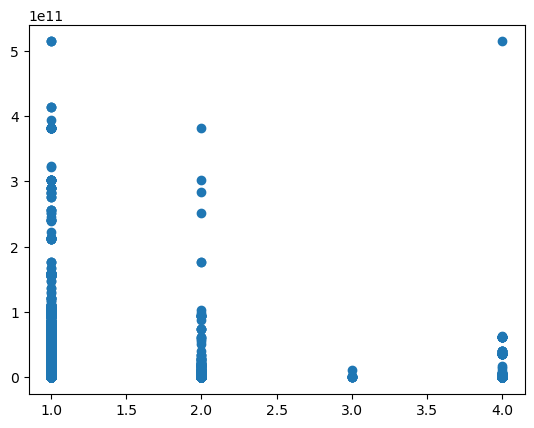

In [15]:
#Try with Global Ultimate Sales
plt.scatter(cleansed_data['entity type conversion'], cleansed_data['Sales (Global Ultimate Total USD)'])
plt.show()

**Observation:**

It is observed that companies in a certain entity type would have their sales cluster around a certain range

## Observe distribution of sales in each entity category

In [16]:
# entity_type = ['Subsidiary','Parent', 'Branch', 'Independent' ]
# for entity in entity_type:
#     df = cleansed_data[cleansed_data['Entity Type'] == entity]
#     sns.histplot(df['Sales (Global Ultimate Total USD)'])

# Decision Tree Regressor: Predict Sales based on Number of Employees in each Entity Category

## Testing the model with `Global Sales` vs `Parent` entity 

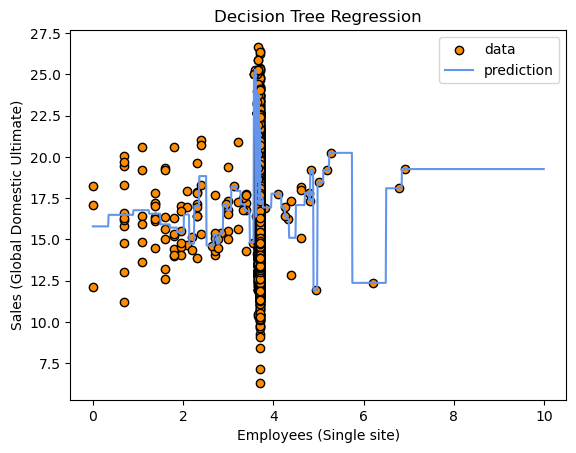

In [17]:
#(1) - TESTING WITH PARENTS + GLOBAL SALES
entity_type = ['Subsidiary','Parent', 'Branch', 'Independent' ]
Parent = cleansed_data[cleansed_data['Entity Type'] == 'Parent']

# Generate some example data
X = np.array(np.log(Parent['Employees (Single Site)'])).reshape(-1,1)
y = np.log(Parent['Sales (Global Ultimate Total USD)'])

# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter

# Fit the model to the data
regressor.fit(X, y)

# Make predictions
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("Employees (Single site)")
plt.ylabel("Sales (Global Domestic Ultimate)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [18]:
# Sample data for demonstration
X = np.array(np.log(Parent['Employees (Single Site)'])).reshape(-1,1)
y = np.log(Parent['Sales (Global Ultimate Total USD)'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 50)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.2239209216634304
Mean Absolute Error: 0.284328748211436


**Remarks**:

- In our testing between `Sales (Global)` and `Employee (Single Site)`, the Decision Tree Regression yields reliable prediction with small Mean Squared Error & Mean Absolute Error
- Now, we will loop through to find what kind of sales (Global or Domestic) as the y-variable and what kind of employees (Single Unit, Domestic, Global) would be perfomed with greater accuracy in Decision Tree Regression

# LOOPING THROUGH EVERY PERMUTATION OF:
## 1. GROUP (PARENT, SUBSIDIARY, ETC.)

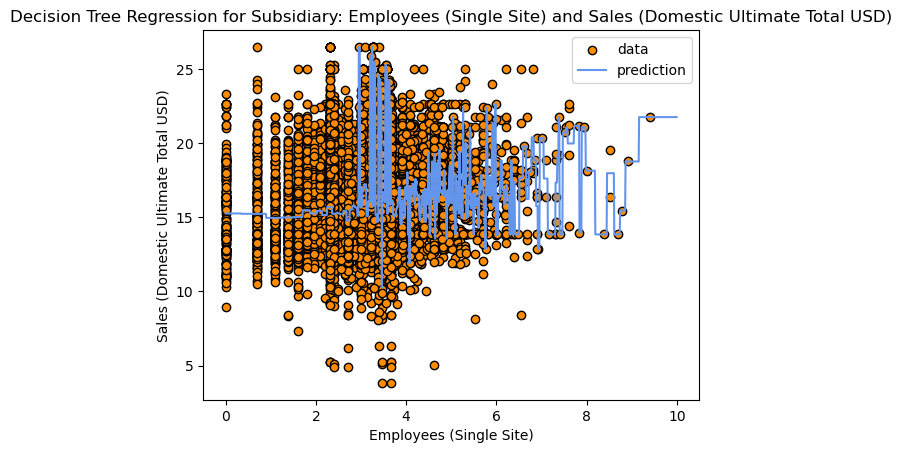

Errors for Subsidiary: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 5.216360216126903
Mean Absolute Error: 1.62354398107036


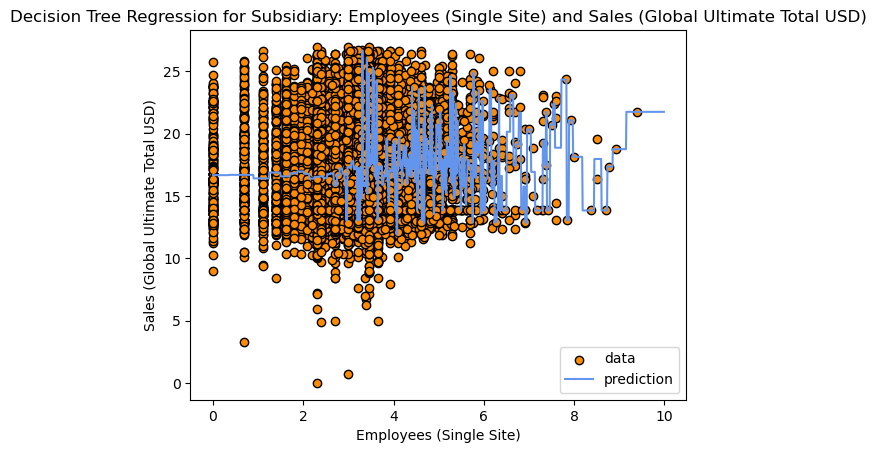

Errors for Subsidiary: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 13.31605144319246
Mean Absolute Error: 2.9154159408608606


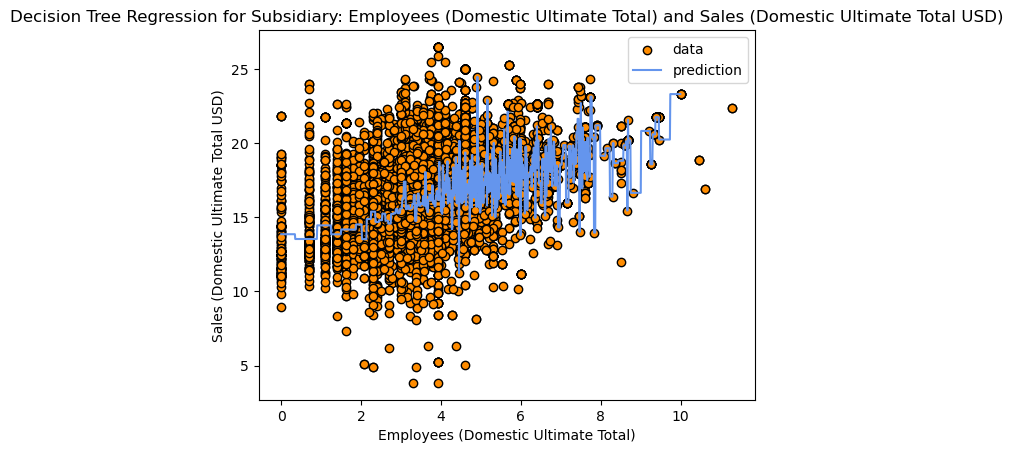

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.280408227058693
Mean Absolute Error: 1.1728860968332833


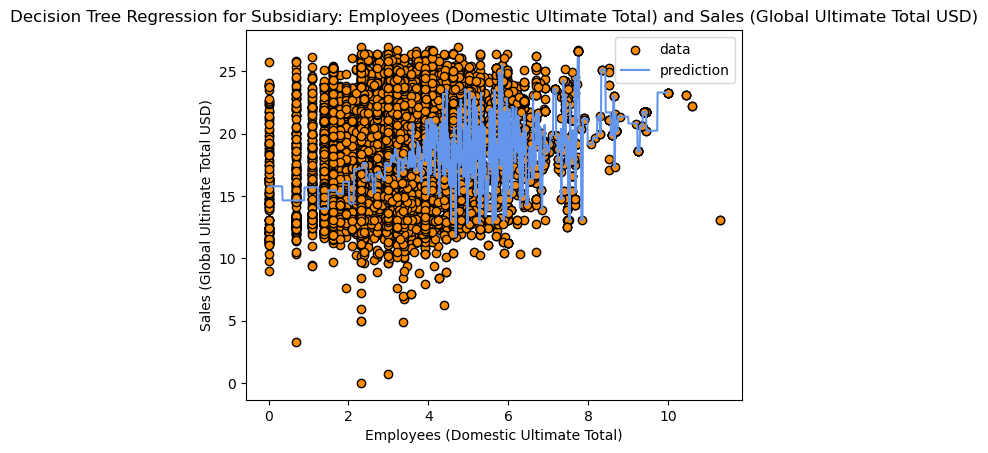

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 9.72883348242358
Mean Absolute Error: 2.2646554420767258


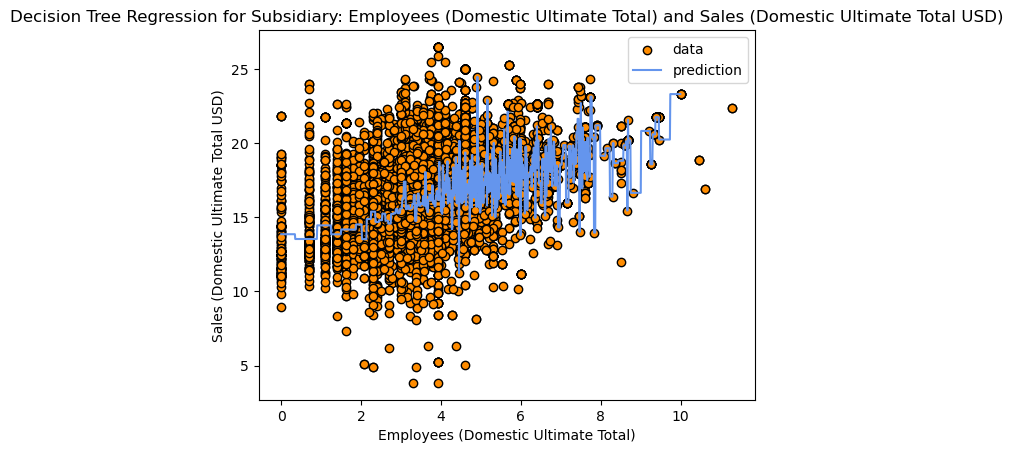

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.280408227058693
Mean Absolute Error: 1.1728860968332833


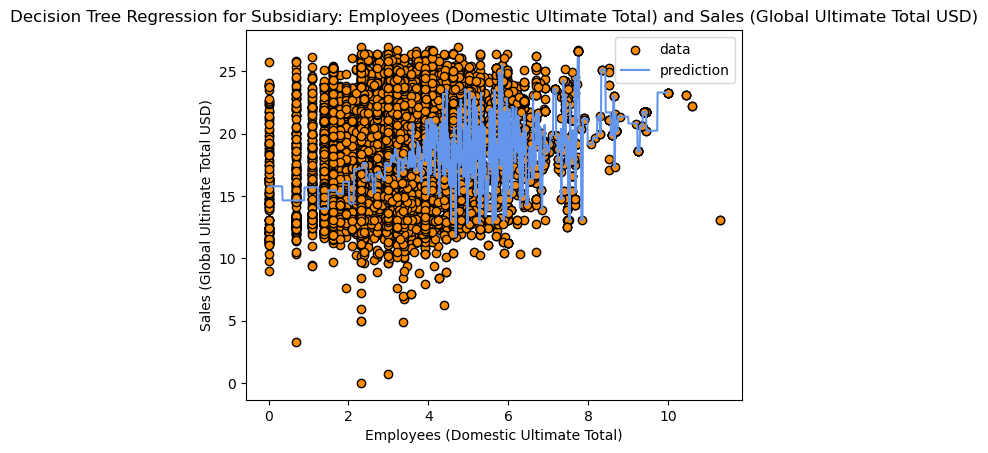

Errors for Subsidiary: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 9.72883348242358
Mean Absolute Error: 2.2646554420767258


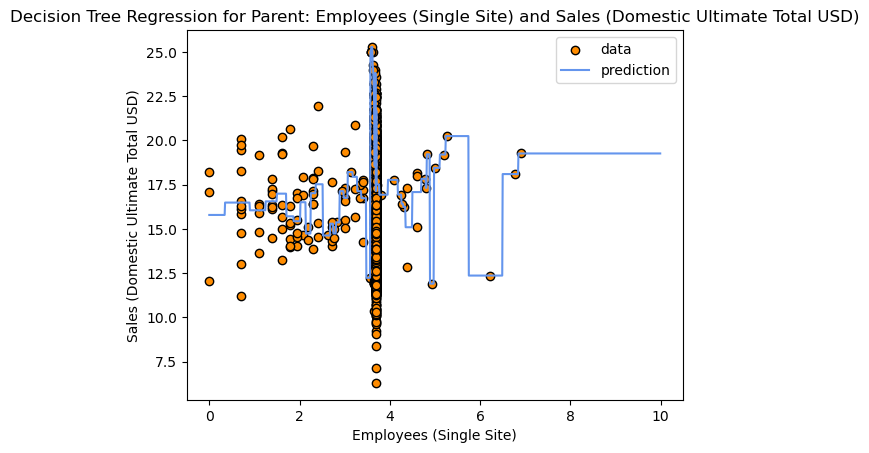

Errors for Parent: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 0.17708219528091476
Mean Absolute Error: 0.07626418711274124


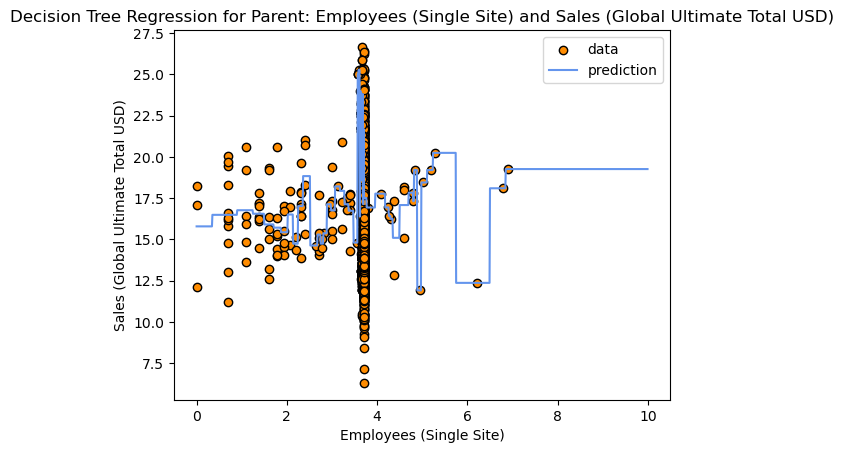

Errors for Parent: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 1.2239209216634304
Mean Absolute Error: 0.284328748211436


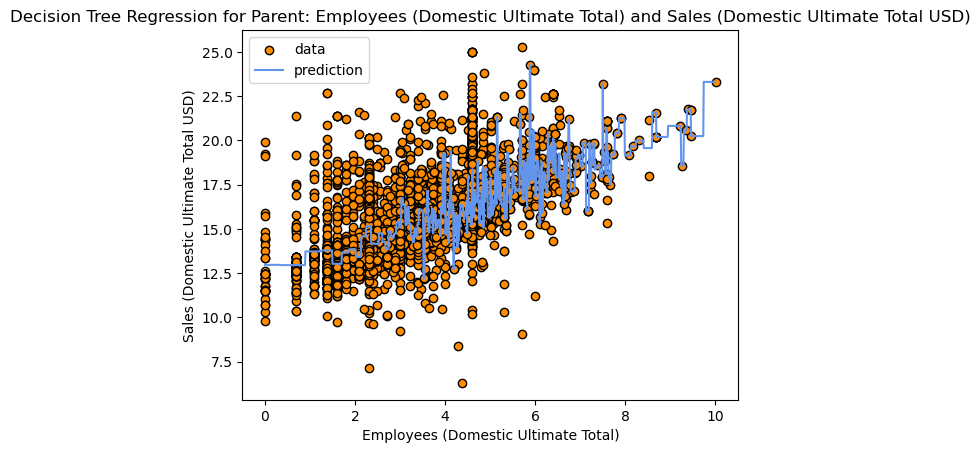

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 1.6408888481195554
Mean Absolute Error: 0.7362931308418492


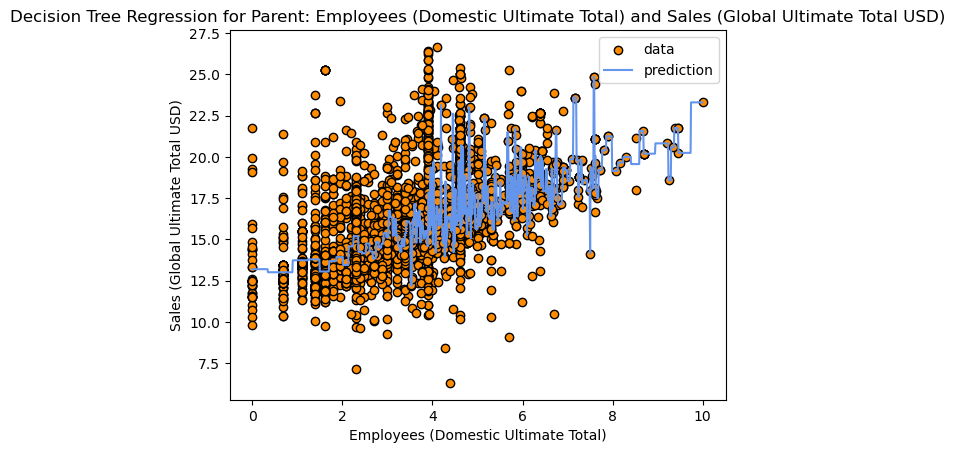

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 2.39920504310509
Mean Absolute Error: 0.8684209289986162


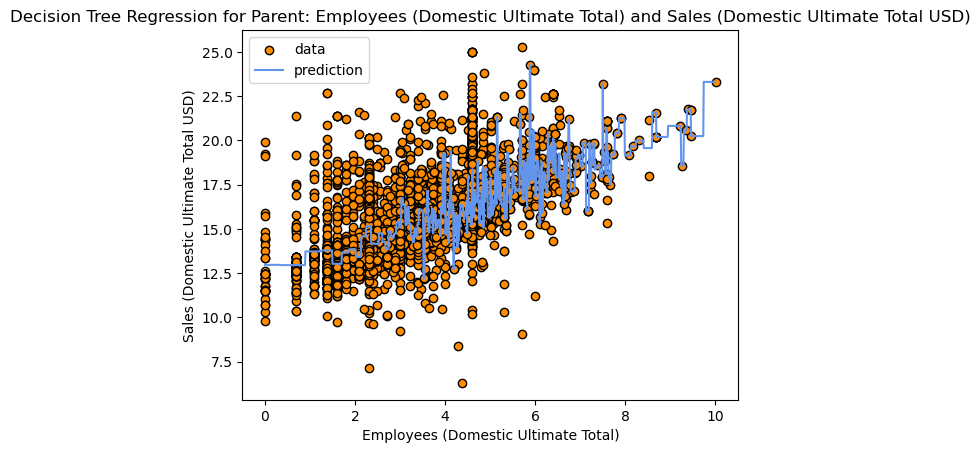

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 1.6408888481195554
Mean Absolute Error: 0.7362931308418492


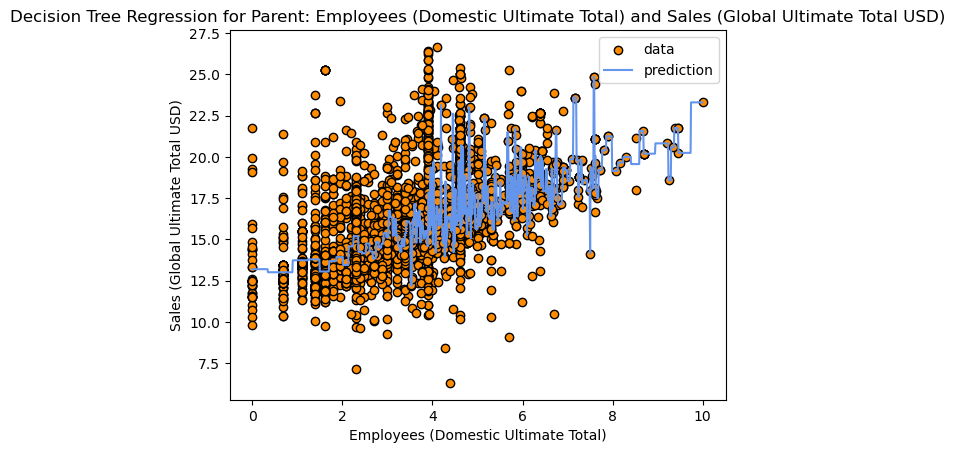

Errors for Parent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 2.39920504310509
Mean Absolute Error: 0.8684209289986162


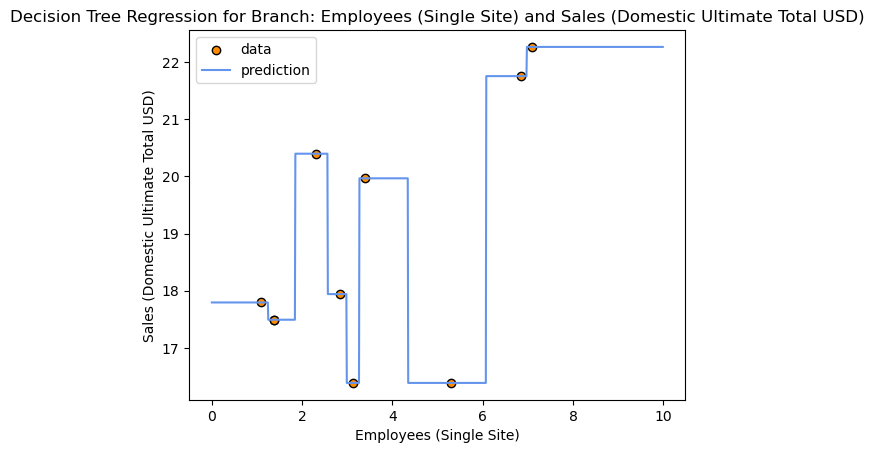

Errors for Branch: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 9.429848984010224
Mean Absolute Error: 3.0189581196467223


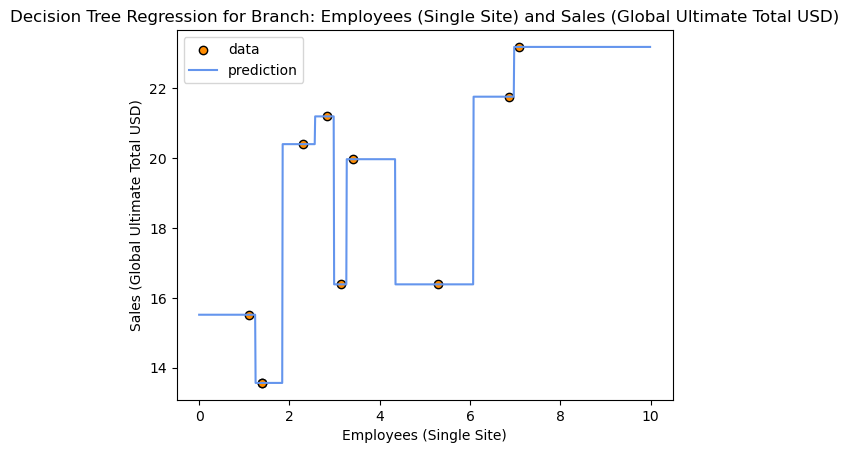

Errors for Branch: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 6.726725183574719
Mean Absolute Error: 2.187562425997358


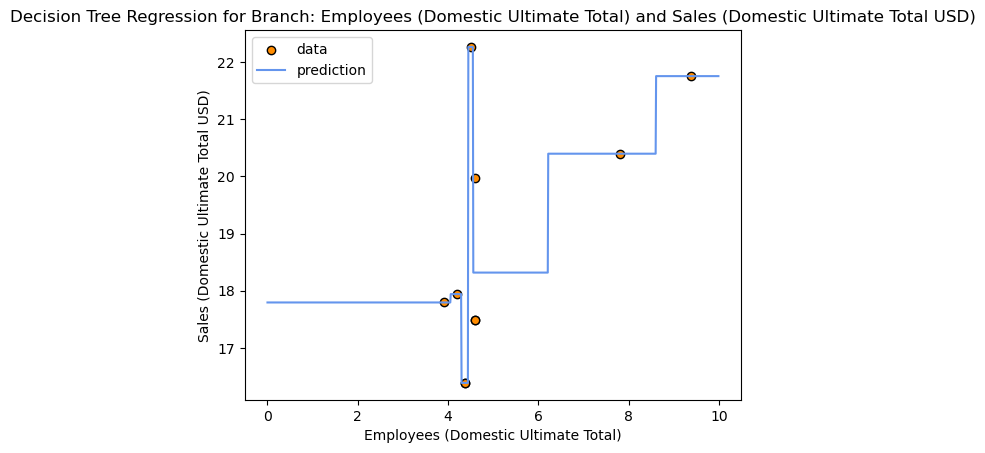

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


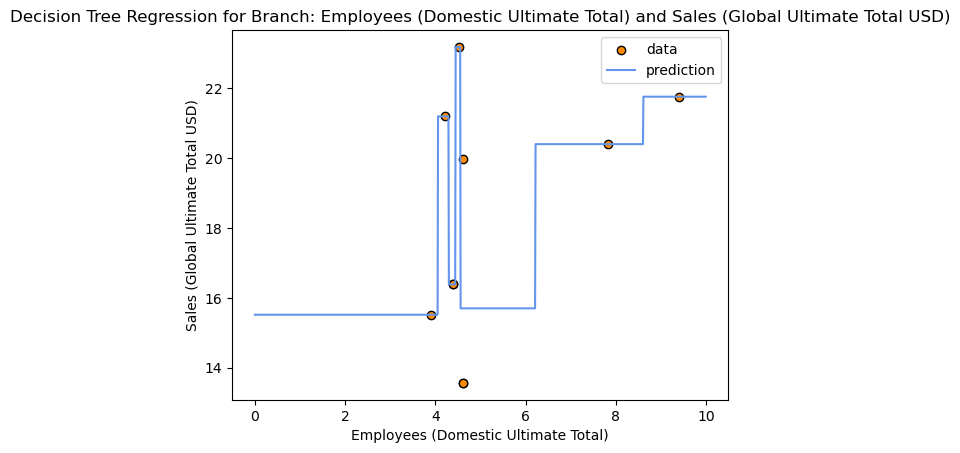

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


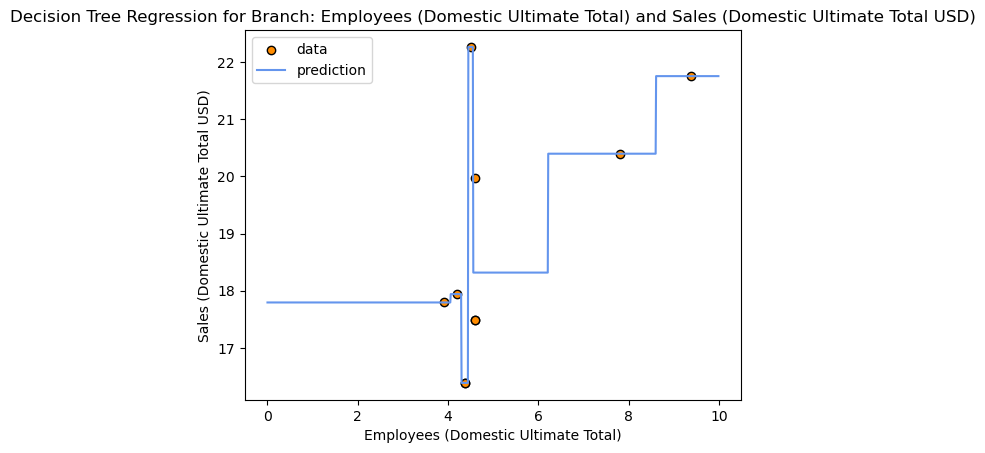

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


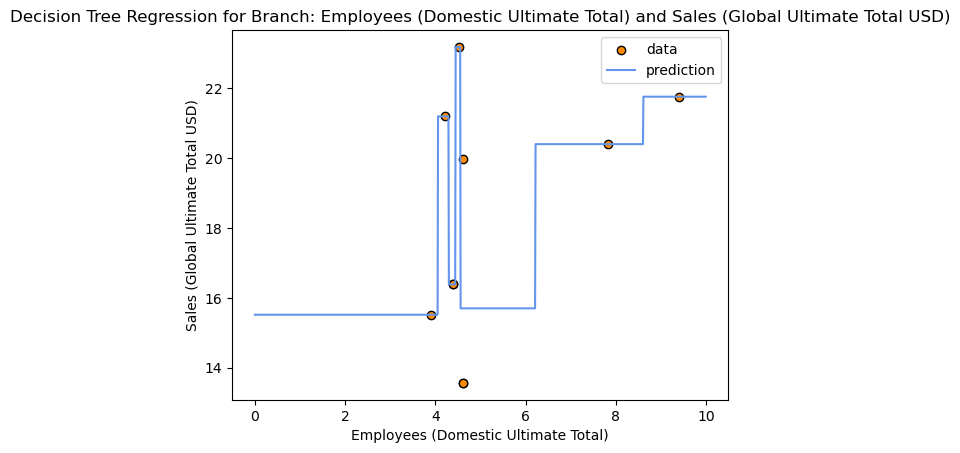

Errors for Branch: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 0.9216377922819872
Mean Absolute Error: 0.6788364281187285


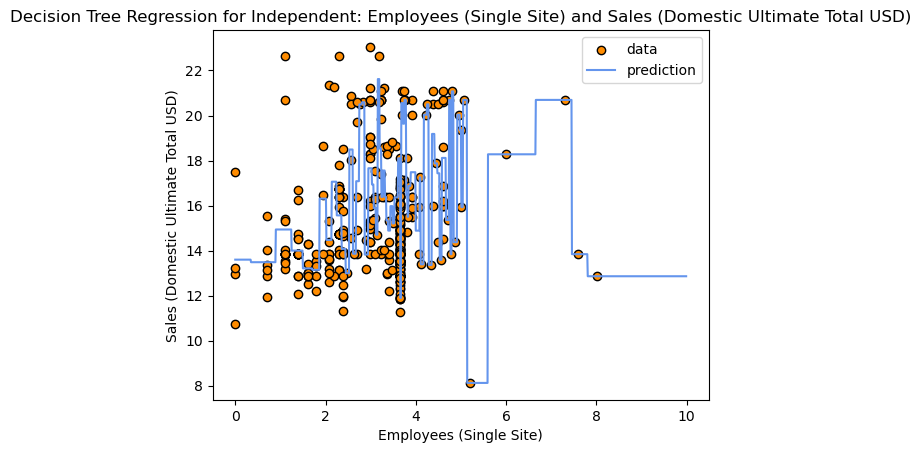

Errors for Independent: Employees (Single Site) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 4.714852754858195
Mean Absolute Error: 1.1261096262777497


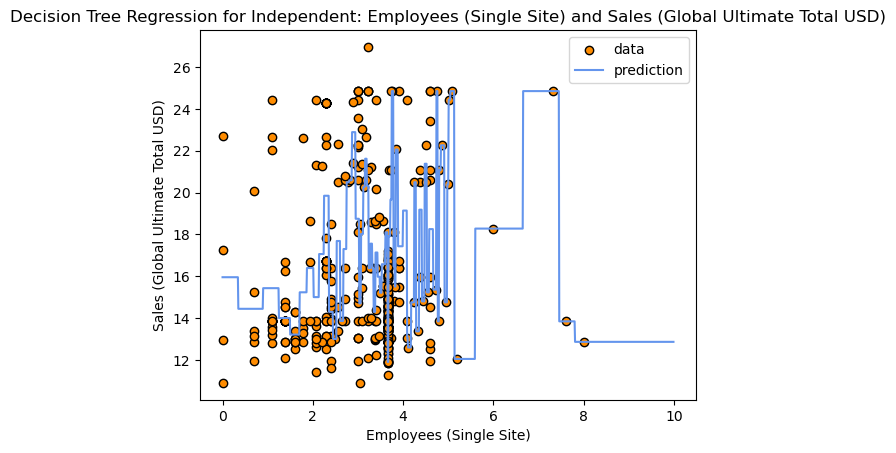

Errors for Independent: Employees (Single Site) and Sales (Global Ultimate Total USD)
Mean Squared Error: 9.089218839238388
Mean Absolute Error: 1.771754786970836


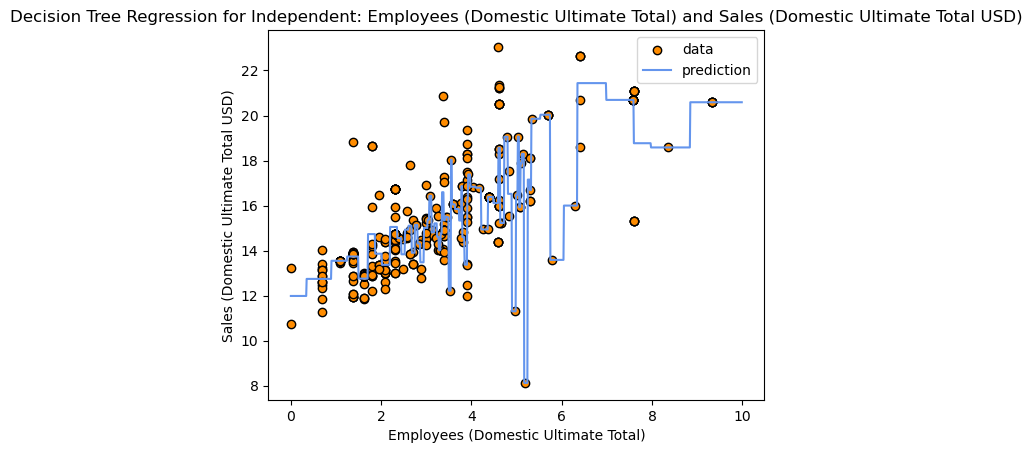

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.6800822248563576
Mean Absolute Error: 1.0676241870721397


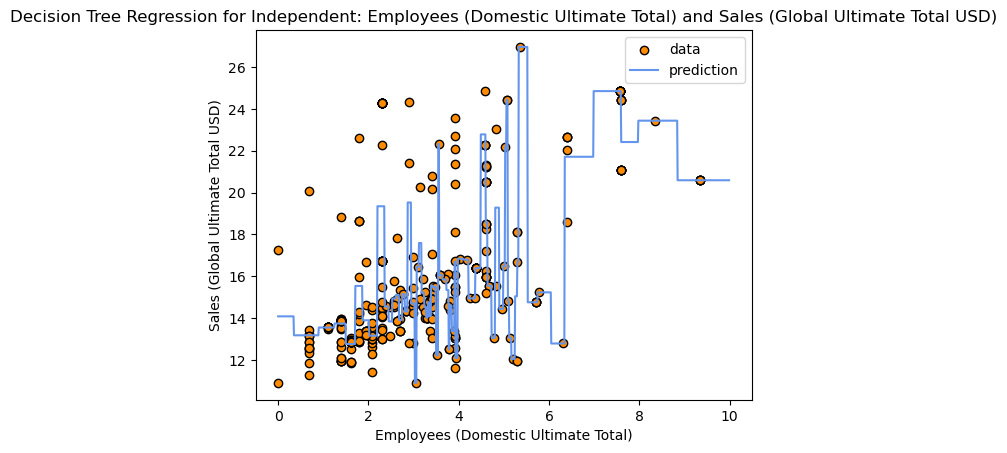

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 5.658161698657922
Mean Absolute Error: 1.3770149199482995


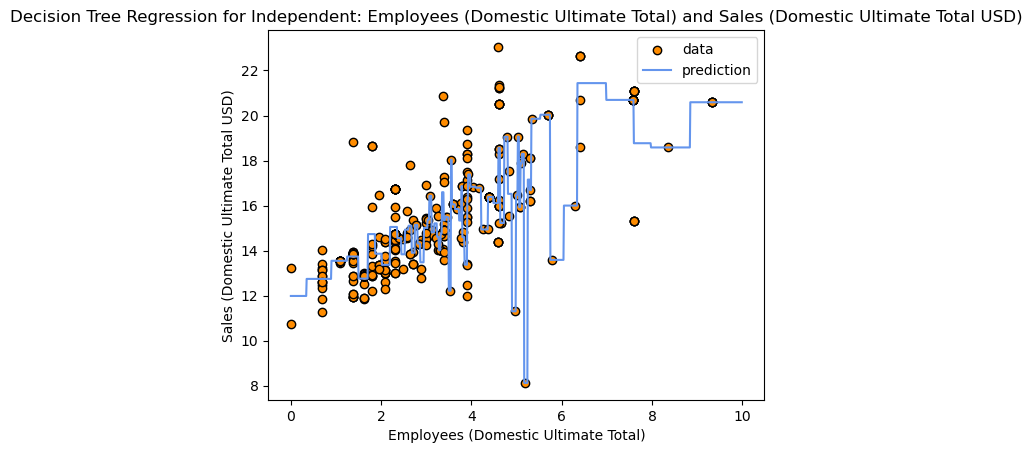

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Domestic Ultimate Total USD)
Mean Squared Error: 3.6800822248563576
Mean Absolute Error: 1.0676241870721397


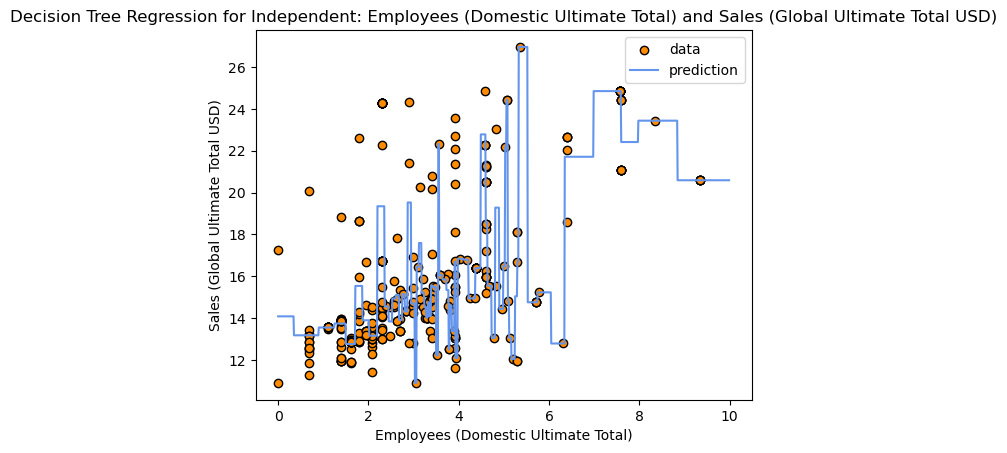

Errors for Independent: Employees (Domestic Ultimate Total) and Sales (Global Ultimate Total USD)
Mean Squared Error: 5.658161698657922
Mean Absolute Error: 1.3770149199482995


In [19]:
#loop through all the groups first
for entity in entity_type:
    group = cleansed_data[cleansed_data['Entity Type'] == entity]
    
    #Loop through all the employees type for this group
    for employee_type in ['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Domestic Ultimate Total)']:
        for sale_type in ['Sales (Domestic Ultimate Total USD)','Sales (Global Ultimate Total USD)']:
            # Generate some example data
            X = np.array(np.log(group[employee_type])).reshape(-1,1)
            y = np.log(group[sale_type])

            # Create a decision tree regressor
            regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter
            
            # Fit the model to the data
            regressor.fit(X, y)
            
            # Make predictions
            X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
            y_pred = regressor.predict(X_test)
            
            # Plot the results
            plt.figure()
            plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
            plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
            plt.xlabel(employee_type)
            plt.ylabel(sale_type)
            plt.title(f"Decision Tree Regression for {entity}: {employee_type} and {sale_type}")
            plt.legend()
            plt.show()

            # Sample data for demonstration
            X = np.array(np.log(group[employee_type])).reshape(-1,1)
            y = np.log(group[sale_type])
            
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Create a DecisionTreeRegressor
            regressor = DecisionTreeRegressor(max_depth = 50)
            
            # Fit the regressor to the training data
            regressor.fit(X_train, y_train)
            
            # Make predictions on the test set
            y_pred = regressor.predict(X_test)
            
            # Calculate the Mean Squared Error (MSE)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            print(f"Errors for {entity}: {employee_type} and {sale_type}")
            print("Mean Squared Error:", mse)
            print("Mean Absolute Error:", mae)

## 2. Entity Type

In [20]:
mean_errors = {'Subsidiary':[],'Parent':[], 'Branch':[], 'Independent':[]}

for entity in entity_type:
    for max_depth in range(1,11):
        group = data[data['Entity Type'] == entity]
        
        # Generate some example data
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Create a decision tree regressor
        regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter
        
        # Fit the model to the data
        regressor.fit(X, y)
        
        # Make predictions
        X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
        y_pred = regressor.predict(X_test)

        # Sample data for demonstration
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Create a DecisionTreeRegressor
        regressor = DecisionTreeRegressor(max_depth = max_depth)
        
        # Fit the regressor to the training data
        regressor.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = regressor.predict(X_test)
        
        # Calculate the Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mean_errors[entity].append((mse+mae)/2)

print(mean_errors)

# print(f"MAX DEPTH: {max_depth}")
# print(f"Errors for {entity}: 'Employees (Domestic Ultimate Total)' and 'Sales (Domestic Ultimate Total USD)'")
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)

{'Subsidiary': [3.0919454202619168, 2.545833419595173, 2.4999734117304375, 2.405581908087358, 2.3570998404593206, 2.3173823791246617, 2.2943578203711312, 2.272503367957395, 2.261767696546947, 2.254244273424697], 'Parent': [1.6730791230367044, 1.3401906164075226, 1.2656344901580192, 1.2090667789547027, 1.1812503251919215, 1.1719966644937434, 1.164152339070864, 1.1680808942372665, 1.1838619828462056, 1.1792381213359375], 'Branch': [0.7323550780320056, 0.6779675844739941, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578, 0.8002371102003578], 'Independent': [2.787689144479213, 2.31968872483651, 2.230789747571171, 2.4934049401918825, 2.2096794798651365, 2.2693170932906397, 2.296638741434548, 2.3833372682500946, 2.369917457949168, 2.3738532059642488]}


# Parameter Tuning: Optimal `Max_Depth`

In [23]:
param = {}
for key,list in mean_errors.items():
    min_index = list.index(min(list))
    param[key] = (min_index + 1)*10
    print(f"Best max depth for {key}: {(min_index + 1)*10}")

Best max depth for Subsidiary: 100
Best max depth for Parent: 70
Best max depth for Branch: 20
Best max depth for Independent: 50


In [24]:
param

{'Subsidiary': 100, 'Parent': 70, 'Branch': 20, 'Independent': 50}

**Note**:
We will thus choose `max_depth` based on our algorithm to find the optimal parameter that yeilds smallest error.

# Sales Predictive Model: Decision Tree Regressor

In [25]:
def predictive_sales(dataframe):
    #remove negative sales data
    dataframe = dataframe[dataframe['Sales (Domestic Ultimate Total USD)'] > 0]
    dataframe = dataframe[dataframe['Sales (Global Ultimate Total USD)'] > 0]
    
    #fill missing employees data
    
    #choose suitable type of employees vs type of sales for decision tree regression
    
    #parameter tuning for optimal max_depth
    
    #return predictive values
    
    return ()
    